In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

### 가상의 분류용 데이터 만들기

- n_samples.n_features : data 수. feature 수
- n_reudundant : 다른 x(feature)들 간의 선형 조합으로 만들어지는 X의 수    
- feature의 개수보다 작아야한다. 아니면 error남
- n_informative : y와 관련있는 X의 수
- n_repeated : 중복되는 X의 수
- n_classes : class의 수  ex)n_classes = 4 -> category 4개 짜리 data
- n_cluster~~ : 각 class 당 cluster 수  
- random_state : random pattern label

feature :2개, class : 2개, data : 100개 

In [114]:
X,y=make_classification(n_samples=100, n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=30)
len(y)

100

shape: 데이터의 개수 X feature의 개수
- N_sampe:100
- n_feature2

In [115]:
X.shape

(100, 1)

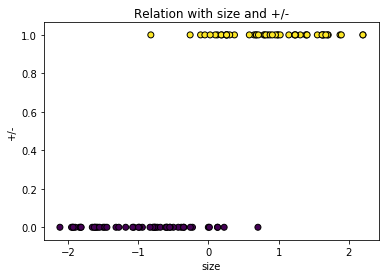

In [116]:
from matplotlib import pyplot as plt
plt.scatter(X,y,marker='o', c=y, edgecolors='k')
plt.xlabel('size')
plt.ylabel('+/-')
plt.title('Relation with size and +/-')
plt.show()

In [117]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.2, shuffle=True)
model=LogisticRegression()
model_logistic=model.fit(X_train, y_train)
print('weight:\n{}\n bias:\n{}'.format(model_logistic.coef_, model_logistic.intercept_))

weight:
[[2.6835803]]
 bias:
[0.37201416]


C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
X

array([[-8.20382239e-01],
       [ 9.85000696e-01],
       [ 2.20060442e+00],
       [ 1.39812364e+00],
       [-1.93050284e+00],
       [-1.12196761e-01],
       [ 7.04371769e-01],
       [-3.50239628e-01],
       [-3.86680912e-01],
       [-1.83682094e+00],
       [-7.72808670e-01],
       [ 3.70378557e-01],
       [ 9.88398306e-01],
       [ 1.38720071e+00],
       [-1.77125524e-03],
       [ 6.49574930e-01],
       [-7.51676180e-01],
       [ 7.87336585e-01],
       [-5.09911121e-02],
       [-1.17833654e+00],
       [ 1.63332039e+00],
       [-7.25574552e-01],
       [ 1.27789479e-01],
       [ 8.47684239e-01],
       [ 8.01728718e-01],
       [-1.89693043e+00],
       [ 2.19847913e+00],
       [-1.57823771e+00],
       [ 1.26048240e-01],
       [-1.59826112e+00],
       [ 2.52113837e-01],
       [-2.27673875e-01],
       [ 1.70483415e+00],
       [-1.31603932e+00],
       [-1.61679515e+00],
       [ 1.61793984e+00],
       [-1.94916755e+00],
       [ 1.64195882e+00],
       [ 1.3

In [119]:
model_logistic.score(X_test,y_test)

0.85

### Logistic Regression의 regularization

In [124]:
X,y = make_classification(n_samples=100, n_features=2, n_clusters_per_class=1, random_statdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXYAAAD8CAYAAABjAo9vAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAFBZJREFUeJzt3X+I3Hedx/HXO+NUJlVuIw1ItruX6klOa2wCi1kJ3I/qXXqH1TSQi7EROQ/DwQkKJZjYxeagXnssao9TOOIpx9FcpGo69qje2tJCuWIW007bbYx7tEWTTATjjz296xxuJu/7YzPb2c33O/Odne93vj/m+QCxuzvOfBj0xcf39/15f8zdBQAojnVpLwAAEC+CHQAKhmAHgIIh2AGgYAh2ACgYgh0ACoZgB4CCIdgBoGAIdgAomNel8aE33HCDb968OY2PBoDceuaZZ37u7hu7vS6VYN+8ebNOnz6dxkcDQG6Z2U+ivI5SDAAUDMEOAAVDsANAwRDsAFAwBDsAFAzBDgAFk0q7IwAMk6nqnE7MnlfTXSUz7d8xpnt3b03s8wh2AEjQVHVOD546t/xz033556TCnVIMACToxOz5nn4fB4IdABLUdO/p93Eg2AEgQSWznn4fB4IdABK0f8dYT7+PAw9PASBBrQekg+yKMU+wzhNmYmLCme4IAL0xs2fcfaLb6/ouxZjZmJk9aWZnzeyMmX2y3/cEAKxdHKWYy5LucvdnzeyNkp4xs8fc/YcxvDcAoEd979jd/afu/uzVf/6NpLOSRvt9XwDA2sTaFWNmmyVtlzQb5/sCAKKLLdjN7A2SviXpU+7+64C/HzSz02Z2+tKlS3F9LABglViC3czKWgr14+5+Mug17n7M3SfcfWLjxq53sQIA1qjvh6dmZpK+Kumsu3+h/yUBQDqqtbqmZ+Z1caGhTSMVHdq1Rbu35++RYRxdMTslfUTSnJk9d/V3n3H378Tw3gAwEFPVOR0/dU6tkz31hYaOnJyTpNyFe9/B7u7/KSm5oQcAkLBqrb4i1Fsai01Nz8znLtiZFQNg6E3PzF8T6i0XFxoDXUscCHYAQ69TeG8aqQxwJfEg2AEMvbDwNkmHdm0Z7GJiQLADGHqHdm1RpVxa8TuTdOfkeO7q6xJjewFgObyL0OooEewACqrXnvTd20dzG+SrEewACqdIPelrQY0dQKFMVef0YIee9GHAjh1AIVRrdR195IwWGouhr8ljT/paEOwAcq21Q48ijz3pa0EpBkBu9RLqee1JXwuCHUBunZg9H/m1ee1JXwtKMQByY3ULY9PDJry8pnXQ6N7dW5NfYEYQ7AByoVqr68jJOTUWm5KWWhi72bC+rHtuv3loduotBDuAXJiemV8O9SgODNkuvR3BDiAXOrUqmrTct379dSV97o6tQ7dLb0ewA8iFTSOVwPLL6EhFTx++NYUVZRddMQByIWgCY6VcGpoWxl6wYweQC0WbwJgkgh1A6qaqczoxe15Nd5XMtH/HWOCDzyJNYEwSwQ4gVXd+5ft6+uVfLv/cdF8+TTqsXS39osYOIDXVWn1FqLfr5VQpViLYAaSm0xjdKKdKEYxgB5CaTr3pJbMBrqRYqLEDGIigq+rCetMlaf+OsQGvsDjYsQNIXGvOS32hIddrV9X98e9vvKY3XZJ2vvVNPDjtA8EOIHFBc14ai009+aNLum/PVo2OVGRaOkX6wL5tOv7x96Sz0IKgFAMgdqsvkw5zcaFBb3oCCHYAseKquvRRigEQq6j958x5SQ47dgCx6tZ/bhJzXhJGsANYs6AWxpJZaLgzYncwKMUAWJOwFsbJt2wIfH1pnVF6GRCCHcCahLUw/vgXDR2YHFf7udHrryvp83tvofQyIJRiAKxJ2DiAiwsN3bt7KweMUsSOHcCahLUq0sKYPoIdwJpwVV12xVKKMbOvSXq/pJ+5+zvjeE8A6QrqeGmvkXNVXXaZxzDz2Mz+QNL/SPrXKME+MTHhp0+f7vtzAcQvbBxApVzSfXu2EtwpMrNn3H2i2+tiKcW4+1OSgq9BAZAbrXEAQdu9xmKz48UYyA66YgAsl13CZqO3dLoYA9kxsGA3s4OSDkrS+Pj4oD4WQBetg0are9KD0PGSDwMLdnc/JumYtFRjH9TnAggWdZfeQsdLflCKAYZMtVbX0UfOaKGxGPk/c/11JX3uDh6c5kVc7Y4nJP2RpBvM7IKke9z9q3G8N4B4rCXQS2bav2OMU6Q5E0uwu/v+ON4HQDJ6qaNLtDbmHaUYoOCqtbrueuj5rnPSW0Y5aJR7BDtQUEu79BfUWLwS6fXs0ouDYAcKqFqr69A3ntfilWi79A3ry7rn9psJ9YIg2IECmp6ZjxTqBHoxEexAAXU7IVoy0+f/gosviopgB3JuqjqnE7Pn1XRfbk/cNFIJPXhkEqFecAQ7kFOtgV3tmu568NQ57Xzrm/SzX/9fYDnmzslxQr3guGgDyJlqra6bP/sf14R6u1Ov/ErTe2/RSKW8/LsN68t6YN82DhsNAXbsQI5EPWjUdNfu7aPszIcUO3YgR6Zn5iOdHi2ZDWA1yCqCHciRqPPQ9+8YS3glyDJKMUCGrb539Hcq5Y5DvExLD0epow83gh3IqNX19PpCQ+WSqbzOrul2IdDRjmAHMiqonr7YdG1YX9b66163vItnYBdWI9iBjAqrpy+8uqjaZ/90wKtBnvDwFMiosPtFuXcU3RDsQEYd2rVFlXJpxe+4dxRRUIoBMqpVN2/viqGejigIdiDDOD2KtaAUAwAFw44dSNjqQ0aUU5A0gh1IUNAhoyMn5ySJcEdiKMUACQo6ZNRYbGp6Zj6lFWEYsGMHYtZeegm7dTTqMC9gLQh2IEZR56VzyAhJItiBPk1V5/Rvs+cUcAtdIA4ZIWkEO9CHoHtHw5hEVwwGgmAH1qhaq0cO9dGRip4+fGvCKwKWEOxAj6q1uo4+cqbjhRftKL1g0Ah2oAdT1TkdP3UutNtltVFKL0gBwQ5EVK3Vewr1B/ZtI9CRCoId6KDXHXrLgclxQh2pIdiBEL10vLSMVMo6+oGbCXWkimAHAvTS8SJJG9aXdc/tBDqygWAHVmmdHo3CJN05Oa57d29NdlFADwh2YJWgwV1B6HhBVsUS7GZ2m6R/kFSS9M/ufn8c7wskbXVP+ob1Zf3q1c796aV1ps/vvYVAR2b1HexmVpL0ZUl/IumCpB+Y2SPu/sN+3xtIUtDD0W6hfv11JX3ujq2EOjItjh37uyW95O6vSJKZfV3SByUR7MisVk96GJNWtDhWyiXdt4dARz7EEeyjks63/XxB0o4Y3heIXWtWer3LPHTXUg2d6+yQR3EEuwX87przHGZ2UNJBSRofH4/hY4HeRJ2VLjG0C/kWx9V4FySNtf18o6SLq1/k7sfcfcLdJzZu3BjDxwK9idrtUi4ZQ7uQa3Hs2H8g6W1mdpOkuqQPSfpwDO8L9KX9irpNI5Wu5ReJh6Mohr6D3d0vm9knJM1oqd3xa+5+pu+VAX1YXXapLzSueSDajp50FEksfezu/h1J34njvYA4BJVdXHS7YDjEUWMHMudiSNml1e1iV/+dUEcRMVIAhRRWU6fbBcOAHTtyq1qra+f9T+imw49q5/1PqFqrL//t0K4tqpRLK17PFXUYFuzYkUtBD0dbExl3bx9dLq+0d8XwcBTDgmBH7oRdgNFYbGp6Zn45vNsDHhgmlGKQK91uNQp7aAoME4IduXJi9nzHv28aqQxoJUB2EezIlaaHXyvNw1FgCTV2ZFK1Vtff/vuZ5fnorUuiS2ah4U5POrCEHTsyp1qr69A3n19x6cVCY1GHvvG8Jt+yIfA/c2BynFAHriLYkSnVWl13PfS8FpvX7soXr7h+/IuGDkyOq2RL06JLZjrAZdLACpRikBmt3vROdfSLCw3du3srQQ50QLAjdVFvNZLoegGiINiRql5uNSqv4wIMIApq7EhV1FuNRiplTe+9hQekQATs2DFQvd5qxLx0oHcEOwaGW42AwSDYkbip6pxOzJ4P7HbhViMgftTYkajW0K5OLYzcagTEix07EtFpl74atxoB8SLYEbs7v/J9Pf3yLyO9lsFdQPwIdsSqWqtHDnUejgLJINgRq+mZ+UivY74LkByCHWu2uif90K4tXW8wKplp/44xQh1IEMGONQm7THpkfXnFuN127NKBwSDY0ZNOA7sai029/nXrVCmXrhkTsPOtbyLUgQEh2BHZVHVOx0+dCz0pKkn/3VjUF/dtu6ZEwwNSYHAIdnQ1VZ3T8dlzitCSrk0jFe3ePkqQAyki2NERPelA/hDsCLT6Mulu6EkHsoNgxzWi1NJbTNIX920j0IEMYQgYVqjW6j2F+p2T44Q6kDHs2LHC9Mx8pFBfX16nv9vzLkIdyCCCHSt0OzkqLfWkH//4ewawGgBrQbBjhU7X1Y1Uyjr6gZvZpQMZR7APoaAZL62wPrRry4pRAdJrtXROjgL5QLAPmbAZL5JWHCzi5CiQX30Fu5ntlXRU0tslvdvdT8exKMSrW096Y7Gp6Zn55fDm5CiQb/22O74oaY+kp2JYCxJQrdV16JvPdz1oFOWhKYB86GvH7u5nJcnM4lkNYjc9M6/FZvcGxk0jlQGsBsAgUGMvoPaHo1F60pnxAhRL12A3s8clvTngT3e7+7ejfpCZHZR0UJLGx8cjLxC96WUcgMSMF6CIuga7u78vjg9y92OSjknSxMRE1NxBD3oZB1BeZ5reewuBDhQQs2IKJOo4gJFKmVAHCqzfdsc7JP2jpI2SHjWz59x9VywrQ886dbaMjlT09OFbB7gaAGnptyvmYUkPx7QW9ClsHIBJPBwFhgilmByq1uraef8Tuunwo9p5/xOq1uqSlsK7Ui6teC2jdYHhQ7tjznQbCSAxDgAYdgR7zkzPzK8Y0CWtHAnAOAAAlGJyJuwBKSMBALSwY8+osNG6YQ9IGQkAoIUdewa16uj1qyMBWnX0aq0e+ICUkQAA2rFjz5DWLj1oR96qo7d60XlACiAMwZ4Rq7tdgrTq6DwgBdAJpZiMCOp2WY06OoAoCPaM6NbVQh0dQFQEe0Z02o2PjlR0356tlF8AREKwZ0RYt8sD+7bp6cO3EuoAIuPh6YCE9aW3MA4AQFwI9oRVa3UdfeSMFhqvXSYdNN+l9c8EOYB+EewJCQr0du3zXQAgTgR7AqL0pEvMdwGQDB6eJiBKT7pEXzqAZLBjj0n7w9Eo947Slw4gKQR7n7rV0oNsWF/WPbffTH0dQCII9j5MVed0/NS5SDt0iUAHMBgE+xpUa3Xd/fCc/ve33evoJtGTDmCgCPYe9Fp2GR2pLI/ZBYBBIdgjitrC2MLDUQBpIdgjitrCKFFLB5Augj2iqIeJDkyO697dWxNeDQCE44BSRFEOExHqALKAYI8oaKxuy0ilrAf2bSPUAWQCpZiIGKsLIC8I9h4wVhdAHgx9sE9V53Ri9rya7iqZaf+OMUoqAHJtaIN9qS/9BTUWryz/rumuB0+dkyTCHUBuDeXD09cOG10J/PuJ2fMDXhEAxGdoduztY3XXmanp4aO7Ov0NALJuKIJ99TiAbsFdMhvEsgAgEYUP9qnq3HLdPKr9O8YSWg0AJK+wwV6t1fWZky/o1ZA6epB1Jn14B6dHAeRbX8FuZtOSbpf0W0kvS/pLd1+IY2H96PZwtKVkpivuHDYCUCj97tgfk3TE3S+b2d9LOiLp0/0vqz9RJjFWyiXdt2crYQ6gcPpqd3T377n75as/npJ0Y/9L6l+USYyEOoCiirOP/WOSvhvj+61Zt0mMBybHCXUAhdU12M3scTN7MeBfH2x7zd2SLks63uF9DprZaTM7fenSpXhWHyJsEqMZo3UBFF/XGru7v6/T383so5LeL+m97uEN4u5+TNIxSZqYmEj0BBCTGAEMs367Ym7T0sPSP3T3V+NZUrj206PdwppJjACGVb9dMV+S9HpJj9nSac1T7v7Xfa8qwOrTo/WFho6cnJMkAhwA2vQV7O7+e3EtpJugFsbGYlPTM/MEOwC0yc10x7AWxqiXTAPAsMhNsIe1MEa5ZBoAhklugj2ohbFSLunQri0prQgAsik3Q8BoYQSAaHIT7BItjAAQRW5KMQCAaAh2ACgYgh0ACoZgB4CCIdgBoGAIdgAoGOswaTe5DzW7JOknCX7EDZJ+nuD75xXfSzC+l3B8N8HS+l5+1903dntRKsGeNDM77e4Taa8ja/hegvG9hOO7CZb174VSDAAUDMEOAAVT1GA/lvYCMorvJRjfSzi+m2CZ/l4KWWMHgGFW1B07AAytwga7mU2b2Y/M7AUze9jMRtJeUxaY2V4zO2NmV8wss0/1B8XMbjOzeTN7ycwOp72erDCzr5nZz8zsxbTXkhVmNmZmT5rZ2av/G/pk2msKU9hgl/SYpHe6+7sk/ZekIymvJytelLRH0lNpLyRtZlaS9GVJfybpHZL2m9k70l1VZvyLpNvSXkTGXJZ0l7u/XdKkpL/J6n9fChvs7v49d7989cdTkm5Mcz1Z4e5n3X0+7XVkxLslveTur7j7byV9XdIHU15TJrj7U5J+mfY6ssTdf+ruz179599IOispkxdEFDbYV/mYpO+mvQhkzqik820/X1BG/4eKbDGzzZK2S5pNdyXBcnWD0mpm9rikNwf86W53//bV19ytpf8LdXyQa0tTlO8FkiQL+B1tYujIzN4g6VuSPuXuv057PUFyHezu/r5Ofzezj0p6v6T3+hD1dXb7XrDsgqSxtp9vlHQxpbUgB8ysrKVQP+7uJ9NeT5jClmLM7DZJn5b0AXd/Ne31IJN+IOltZnaTmV0n6UOSHkl5TcgoMzNJX5V01t2/kPZ6OilssEv6kqQ3SnrMzJ4zs39Ke0FZYGZ3mNkFSe+R9KiZzaS9prRcfbj+CUkzWnoQ9pC7n0l3VdlgZickfV/SFjO7YGZ/lfaaMmCnpI9IuvVqpjxnZn+e9qKCcPIUAAqmyDt2ABhKBDsAFAzBDgAFQ7ADQMEQ7ABQMAQ7ABQMwQ4ABUOwA0DB/D84/U0hHxzw3gAAAABJRU5ErkJggg==e=30, n_redundant=3, n_informative=1, n_repeated= 0)


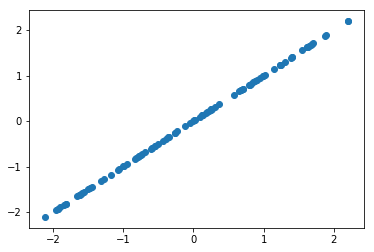

In [154]:
#plt.scatter(1,2)
#plt.scatter(2,3)
plt.scatter(X[0:,1], X[0:,1])
plt.show()

In [142]:
model=LogisticRegression(penalty='l1', C=0.5)
#default=12, C=1.0  C는 alpha의 역수
#즉, overfitting이라면, 규제를 강하게! C를 작게!

In [143]:
model_logistic=model.fit(X_train,y_train)
print('weight:\n{}\n bias:\n{}'.format(model_logistic.coef_, model_logistic.intercept_))

weight:
[[2.90640808]]
 bias:
[0.15292716]


### multinomial Classification(다중분류)

In [157]:
X,y = make_classification(n_samples=100,n_features=10, 
                          n_informative=4, n_classes=4) #위에서 다중분류니까 n_cluster에서 신경썼듯이

In [162]:
y  # target value(y값) =0, 1, 2, 3 중에 하나

array([3, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 1, 2,
       0, 3, 2, 1, 2, 2, 0, 2, 1, 3, 2, 3, 0, 3, 1, 1, 1, 0, 1, 2, 3, 2,
       3, 0, 1, 2, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 2, 3, 0, 2, 2, 2, 3,
       0, 0, 0, 1, 2, 0, 1, 0, 3, 2, 0, 0, 3, 1, 0, 1, 2, 1, 3, 1, 3, 2,
       3, 3, 2, 0, 2, 1, 3, 3, 3, 0, 2, 2])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                shuffle=True)
model = LogisticRegression(C=0.5)
model_logistic_ovr =model.fit(X_train,y_train)  #ovr : 1 대 多

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


예측 메서드 =predict(X_data)  //예측 시킬 때에는 X값만 넣어줘

In [169]:
print('X_test:{}\n y_test:{}'.format(X_test.shape, y_test.shape))

X_test:(20, 10)
 y_test:(20,)


In [167]:
model_logistic_ovr.predict(X_test)

array([1, 2, 2, 3, 2, 3, 2, 0, 0, 1, 3, 0, 3, 3, 3, 1, 1, 1, 3, 1])

- 예측 결과 분석  
1) 예측 데이터 개수 :20개  
2) 예측 카테고리(클래스) : 0 or 1 or 2 or 3 (total 4개)

In [171]:
model_logistic_ovr.predict_proba(X_test)

array([[3.07980323e-02, 5.28494985e-01, 3.87446302e-01, 5.32606802e-02],
       [1.82704941e-01, 2.61565470e-01, 3.34824975e-01, 2.20904614e-01],
       [1.74421753e-01, 3.31062183e-01, 4.89393151e-01, 5.12291339e-03],
       [3.44131384e-01, 5.93481794e-02, 2.10039034e-02, 5.75516533e-01],
       [6.03504710e-02, 2.83010927e-01, 5.82316958e-01, 7.43216439e-02],
       [7.76128091e-03, 2.86982402e-01, 3.51162859e-01, 3.54093458e-01],
       [2.29836555e-02, 2.19676058e-01, 7.42323085e-01, 1.50172021e-02],
       [6.21149749e-01, 1.33788389e-01, 9.59390632e-02, 1.49122799e-01],
       [7.67939203e-01, 7.31209213e-02, 8.10309845e-02, 7.79088913e-02],
       [5.84162647e-04, 4.05604839e-01, 2.51360582e-01, 3.42450416e-01],
       [2.59137408e-01, 1.46116925e-01, 1.87914047e-01, 4.06831619e-01],
       [5.88036143e-01, 7.32081430e-02, 1.78295768e-02, 3.20926138e-01],
       [1.95448595e-01, 2.18372965e-01, 1.91774959e-02, 5.67000944e-01],
       [1.29240627e-01, 2.79775637e-01, 2.08604127e

위의 방식은 1 : 多 방식으로, 다중 분류를 한 것이다.  
Softmax로 다중분류를 하고 싶다면?

softmax를 지원하는 opimizer를 정해주자  
- 기본 optimizer : liblinear(softmax 지원X)
- softmax를 지원 :  
1) lbfgs(limited memory bfgs)  : L2규제만 지원  
2) newton_cg  : L2규제만 지원  
3) sag  :  L2규제만 지원  
4) saga : L1, L2 규제 지원

In [183]:
#model_softmax=LogisticRegression(multi_class='multinomial',
 #                                solver ='lbfgs', C=0.5)
model_softmax=LogisticRegression(multi_class='multinomial',
                                 solver = 'saga', C=0.5)

In [184]:
model_softmax.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
model_softmax.predict(X_test)

array([1, 2, 2, 3, 2, 1, 2, 0, 0, 1, 3, 0, 3, 3, 3, 1, 1, 1, 3, 1])

In [186]:
model_softmax.predict_proba(X_test)

array([[2.62563071e-03, 7.13802187e-01, 2.55856402e-01, 2.77157798e-02],
       [8.32811273e-02, 2.68915439e-01, 4.23384296e-01, 2.24419138e-01],
       [4.81880887e-02, 2.97982634e-01, 6.50840437e-01, 2.98884051e-03],
       [6.80914128e-02, 1.60362990e-02, 2.81507830e-03, 9.13057210e-01],
       [5.89677175e-03, 2.69326305e-01, 6.71643813e-01, 5.31331099e-02],
       [4.30261076e-04, 3.59424162e-01, 3.20240050e-01, 3.19905527e-01],
       [3.39552433e-04, 7.75294054e-02, 9.18133922e-01, 3.99712012e-03],
       [8.00927304e-01, 7.18162174e-02, 3.06427271e-02, 9.66137520e-02],
       [9.62183781e-01, 1.07409214e-02, 7.37326969e-03, 1.97020276e-02],
       [1.71730474e-05, 5.80580323e-01, 2.30554261e-01, 1.88848243e-01],
       [6.78872332e-02, 1.80233854e-01, 1.15956395e-01, 6.35922518e-01],
       [9.33245364e-01, 6.60977138e-03, 8.88380583e-04, 5.92564839e-02],
       [7.21195588e-02, 1.17681227e-01, 4.97102066e-03, 8.05228194e-01],
       [3.91371270e-02, 1.83449920e-01, 6.55855677e